In [13]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import seaborn as sns

style.use("ggplot")

%matplotlib inline

In [14]:
#I only have to do this once. Then I just save the data as a csv file and read it in.
#start = dt.datetime(1962, 1, 3)
#end = dt.datetime(2012, 11, 9)

#df = web.DataReader("^GSPC", "yahoo", start, end)
#print(df.head())

In [15]:
#here I add a smaller version of the data so it is not so heavy on the computer to work with as I find 
# many times crashing the python environment
#start = dt.datetime(2010, 1, 3)
#end = dt.datetime(2012, 11, 9)

#df = web.DataReader("^GSPC", "yahoo", start, end)
#print(df.tail())

In [16]:
#pd.DataFrame(df).to_csv("^GSPC_jupyter.csv")

In [17]:
#type(df) # This was that the df is a dataframe type


In [18]:
GSPC = pd.read_csv("SHORT_GSPC_Data.csv")
GSPCdf = pd.DataFrame(GSPC)
GSPCdf.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,11/9/2012,1377.55,1391.39,1373.03,1379.85,3647350000,1379.85
1,11/8/2012,1394.53,1401.23,1377.51,1377.51,3779520000,1377.51
2,11/7/2012,1428.27,1428.27,1388.14,1394.53,4356490000,1394.53
3,11/6/2012,1417.26,1433.38,1417.26,1428.39,3306970000,1428.39
4,11/5/2012,1414.02,1419.90,1408.13,1417.26,2921040000,1417.26


In [19]:
GSPCdf["Returns"] = (GSPCdf.Close - GSPCdf.Open) / GSPCdf.Open
GSPCdf.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Returns
0,11/9/2012,1377.55,1391.39,1373.03,1379.85,3647350000,1379.85,0.001670
1,11/8/2012,1394.53,1401.23,1377.51,1377.51,3779520000,1377.51,-0.012205
2,11/7/2012,1428.27,1428.27,1388.14,1394.53,4356490000,1394.53,-0.023623
3,11/6/2012,1417.26,1433.38,1417.26,1428.39,3306970000,1428.39,0.007853
4,11/5/2012,1414.02,1419.90,1408.13,1417.26,2921040000,1417.26,0.002291


In [20]:
GSPCdf.describe() # very useful to see the count value

,Open,High,Low,Close,Volume,Adj Close,Returns
count,468.000000,468.000000,468.000000,468.000000,4.680000e+02,468.000000,468.000000
mean,1316.805427,1325.273654,1307.742244,1317.077714,3.914507e+09,1317.077714,0.000275
std,77.487146,74.569817,80.220363,77.519672,7.806098e+08,77.519672,0.011791
min,1097.420000,1125.120000,1074.770000,1099.230000,1.025000e+09,1099.230000,-0.065934
25%,1275.532500,1281.952500,1265.335000,1275.560000,3.533628e+09,1275.560000,-0.004501
50%,1321.750000,1330.430000,1313.465000,1321.845000,3.880780e+09,1321.845000,0.000533
75%,1367.207500,1374.722500,1362.397500,1367.870000,4.298310e+09,1367.870000,0.006177
max,1465.420000,1474.510000,1460.070000,1465.770000,6.703140e+09,1465.770000,0.046687


In [21]:
Rtcount = len(GSPCdf.Returns)
Rtcount

468

In [22]:
Bins = [-0.025, -0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02, 0.025]

In [23]:
intervals = ["-0.025 to -0.02", "-0.02 to -0.015", "-0.015 to -0.01", "-0.01 to -0.005","-0.005 to 0", 
             "0 to 0.005", "0.005 to 0.01", "0.01 to 0.015", "0.015 to 0.02", "0.02 to 0.025"]
intervals

['-0.025 to -0.02',
 '-0.02 to -0.015',
 '-0.015 to -0.01',
 '-0.01 to -0.005',
 '-0.005 to 0',
 '0 to 0.005',
 '0.005 to 0.01',
 '0.01 to 0.015',
 '0.015 to 0.02',
 '0.02 to 0.025']

In [24]:
intervalscount =  len(intervals)
intervalscount

10

In [25]:
GSPCdf["Return % Bins"] = pd.cut(GSPCdf["Returns"], Bins, labels=intervals)
GSPCdf.tail()

,Date,Open,High,Low,Close,Volume,Adj Close,Returns,Return % Bins
463,1/7/2011,1274.41,1276.83,1261.70,1271.50,4963110000,1271.50,-0.002283,-0.005 to 0
464,1/6/2011,1276.29,1278.17,1270.43,1273.85,4844100000,1273.85,-0.001912,-0.005 to 0
465,1/5/2011,1268.78,1277.63,1265.36,1276.56,4764920000,1276.56,0.006132,0.005 to 0.01
466,1/4/2011,1272.95,1274.12,1262.66,1270.20,4796420000,1270.20,-0.002160,-0.005 to 0
467,1/3/2011,1257.62,1276.17,1257.62,1271.87,4286670000,1271.87,0.011331,0.01 to 0.015


In [26]:
GSPCdfReturn = GSPCdf.loc[:, "Returns":"Return % Bins"]
GSPCdfReturn.head()

,Returns,Return % Bins
0,0.001670,0 to 0.005
1,-0.012205,-0.015 to -0.01
2,-0.023623,-0.025 to -0.02
3,0.007853,0.005 to 0.01
4,0.002291,0 to 0.005


In [27]:
#Get the average of return that is negative
avgNegReturns = GSPCdf.loc[:,"Returns"]
avgNegReturns = avgNegReturns.loc[avgNegReturns<0]
avgNegReturns = avgNegReturns.mean()
avgNegReturns

-0.008476539117035817

In [28]:
#Get the average of return that is positive
avgPosReturns = GSPCdf.loc[:,"Returns"]
avgPosReturns = avgPosReturns.loc[avgPosReturns>0]
avgPosReturns = avgPosReturns.mean()
avgPosReturns

0.007776517787097856

In [29]:
#Get the average of return that is zero
avgZeroReturns = GSPCdf.loc[:,"Returns"]
avgZeroReturns = avgZeroReturns.loc[avgZeroReturns==0]
avgZeroReturns = avgZeroReturns.mean()
avgZeroReturns

nan

In [30]:
#Get the count of negative and positive returns
NegReturns = len(GSPCdfReturn.loc[(GSPCdfReturn.Returns < 0)])
NegReturns

216

In [31]:
PosReturns = len(GSPCdfReturn.loc[(GSPCdfReturn.Returns > 0)])
PosReturns

252

In [32]:
ZeroReturns = len(GSPCdfReturn.loc[(GSPCdfReturn.Returns == 0)])
ZeroReturns

0

In [33]:
ReturnCount = GSPCdfReturn["Returns"].count()
PosReturnsPer = PosReturns/ReturnCount*100
PosReturnsPer

53.84615384615385

In [34]:
NegReturnPer = NegReturns/ReturnCount*100
NegReturnPer

46.15384615384615

In [35]:
ZeroReturns = ZeroReturns/ReturnCount*100
ZeroReturns

0.0

In [36]:
TotalAvgPosReturns = avgPosReturns*PosReturnsPer
TotalAvgPosReturns

0.418735573151423

In [37]:
TotalAvgNegReturns = avgNegReturns*NegReturnPer
TotalAvgNegReturns

-0.39122488232473

In [38]:
GSPCgrp = GSPCdfReturn.groupby("Return % Bins")
GSPCgrpCount = GSPCgrp.count() #I count how many times the Percentage returns appear in the data set
GSPCgrpCount = GSPCgrpCount.reset_index() #I reset the index to numbers
GSPCgrpCount["Return Frequency (%)"] = GSPCgrpCount["Returns"]/Rtcount*100
GSPCgrpCount = GSPCgrpCount.round(2)
GSPCgrpCount

,Return % Bins,Returns,Return Frequency (%)
0,-0.025 to -0.02,12,2.56
1,-0.02 to -0.015,16,3.42
2,-0.015 to -0.01,23,4.91
3,-0.01 to -0.005,51,10.90
4,-0.005 to 0,103,22.01
5,0 to 0.005,120,25.64
6,0.005 to 0.01,64,13.68
7,0.01 to 0.015,33,7.05
8,0.015 to 0.02,18,3.85
9,0.02 to 0.025,7,1.50


In [39]:
Return_mean = GSPCdf["Returns"].mean()*100
Return_mean

0.027510690826692906

In [40]:
histReturns = GSPCdf["Returns"]
histReturns

0      0.001670
1     -0.012205
2     -0.023623
3      0.007853
4      0.002291
5     -0.009379
6      0.010898
7      0.000829
8     -0.000729
9      0.002291
10    -0.003149
11    -0.014389
12     0.000419
13    -0.016571
14    -0.002464
15     0.004600
16     0.010144
17     0.007965
18    -0.002966
19     0.000014
20    -0.006188
21    -0.009905
22    -0.003457
23    -0.000322
24     0.007112
25     0.003416
26     0.000526
27     0.002491
28    -0.004464
29     0.009621
         ...   
438    0.002702
439    0.007955
440    0.002837
441   -0.001210
442    0.004406
443    0.005488
444    0.002953
445    0.003324
446   -0.001440
447    0.014312
448    0.007536
449   -0.017920
450    0.001565
451    0.003607
452    0.002337
453    0.005883
454   -0.000218
455   -0.000461
456   -0.009733
457    0.001392
458    0.008060
459   -0.001571
460    0.008082
461    0.001493
462   -0.000858
463   -0.002283
464   -0.001912
465    0.006132
466   -0.002160
467    0.011331
Name: Returns, Length: 4

# make the line plot of the stock prices over time
stockPrice = sns.lineplot(x="Date", y="Close", data=GSPCdf)
stockPrice = sns.regplot(x="Date", y="Close", data=GSPCdf)
stockPrice.show()

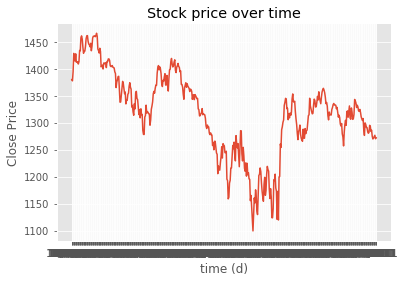

In [41]:
#make the line plot using matplotlib
fig = plt.figure()
fig = plt.plot("Date", "Close", data=GSPCdf)
fig = plt.xlabel("time (d)")
fig = plt.ylabel("Close Price")
fig = plt.title("Stock price over time")
plt.show()

In [42]:
#trying to make the linear regression plot with seaborne


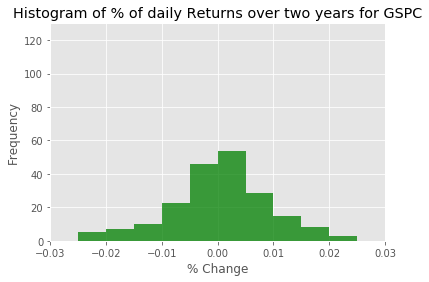

In [43]:
#make the histogram plot
_= plt.hist(histReturns, bins=Bins, density=1, facecolor='g', alpha=0.75)
plt.title("Histogram of % of daily Returns over two years for GSPC")
plt.xlabel("% Change")
plt.ylabel("Frequency")
plt.axis([-0.03, 0.03, 0, 130])
plt.grid(True)
plt.show()